# Loading & Preprocessing

In [39]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

------------
### Python version: 3.10.13 (main, Sep 11 2023, 13:21:10) [GCC 11.2.0]
### NumPy version: 1.26.3
### Scikit-learn version: 1.3.0
------------


In [40]:
# Set the seed
seed = 42
np.random.seed(seed)

In [41]:
# load diabetes dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

df.info()

# the target is Diabetes_012: 0 = no diabetes, 1 = pre-diabetes, 2 = diabetes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [42]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [43]:
# check if any null values present
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [44]:
# Split the data into features (X) and the target variable (y)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']+99p

print(X.shape)
print(y.shape)

(253680, 21)
(253680,)


## a) Feature scaling & train-test-val split

In [45]:
# Scale features using min-max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [46]:
# Split the data into train-validation-test sets: 90-0.05-0.05
train_x, temp_x, train_y, temp_y = train_test_split(scaled_X, y, test_size=0.1, random_state=seed)
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=seed)

In [47]:
print(df.shape)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

(253680, 22)
(228312, 21)
(12684, 21)
(12684, 21)


In [48]:
# see distribution of target variable (class imbalances)
class_distribution = np.bincount(train_y)

# Calculate the percentage of each class in the training set
class_percentages = class_distribution / class_distribution.sum() * 100
print(class_percentages) # Clearly the data is imbalanced

[84.22772347  1.82119205 13.95108448]


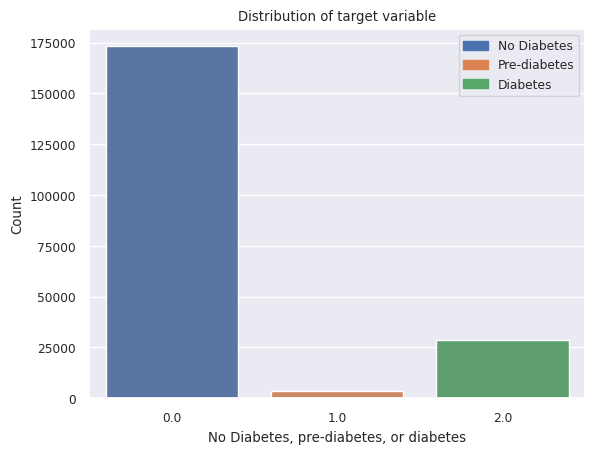

In [49]:
# visualize train data class distributions 
target_col = df.columns[0]
df_excluded = df.drop(columns=[target_col])
train_df = pd.DataFrame(train_x, columns=df_excluded.columns)
train_df['Diabetes_012'] = train_y 

sns.countplot(x='Diabetes_012', data=train_df)
plt.xlabel('No Diabetes, pre-diabetes, or diabetes')
plt.ylabel('Count')
plt.title('Distribution of target variable')

legend_labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette()[:3]]  
plt.legend(legend_handles, legend_labels)

plt.show()

## b) Data imbalance techniques

In [50]:
from sklearn.utils import resample
from sklearn.utils import class_weight

# # #1: Upsampling (Over-sampling)
# Separate majority and minority classes
majority_class = train_df[train_df['Diabetes_012'] == 0]
minority_class1 = train_df[train_df['Diabetes_012'] == 1]
minority_class2 = train_df[train_df['Diabetes_012'] == 2]

# Upsample minority class
minority_upsampled1 = resample(minority_class1, 
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42)

minority_upsampled2 = resample(minority_class2, 
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled1, minority_upsampled2])

# Shuffle the upsampled DataFrame to ensure randomness
upsampled = upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

target_distribution = upsampled['Diabetes_012'].value_counts()
print(target_distribution)

Diabetes_012
1.0    173199
0.0    173199
2.0    173199
Name: count, dtype: int64


In [51]:
# # #2: Downsampling (Under-sampling)
majority_class = train_df[train_df['Diabetes_012'] == 0]
minority_class1 = train_df[train_df['Diabetes_012'] == 1]
minority_class2 = train_df[train_df['Diabetes_012'] == 2]

# Downsample majority class
majority_downsampled1 = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class1),
                                 random_state=42)

majority_downsampled2 = resample(minority_class2, 
                                 replace=False,
                                 n_samples=len(minority_class1), 
                                 random_state=42)

# Combine minority class with downsampled majority classes
downsampled = pd.concat([majority_downsampled1, minority_class1, majority_downsampled2])

# Shuffle the downsampled DataFrame to ensure randomness
downsampled = downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

target_distribution = downsampled['Diabetes_012'].value_counts()
print(target_distribution)

Diabetes_012
1.0    3732
0.0    3732
2.0    3732
Name: count, dtype: int64


In [52]:
from imblearn.over_sampling import SMOTE

# # #3: Apply SMOTE: generates synthetic samples for the minority class to balance the class distribution
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(train_x, train_y)

target_distribution = y_smote.value_counts()
print(target_distribution)

Diabetes_012
0.0    192302
2.0    192302
1.0    192302
Name: count, dtype: int64


In [53]:
# set train_df to whichever data imbalance technique we want to use
train_df = pd.DataFrame(X_smote, columns=df_excluded.columns)
train_df['Diabetes_012'] = y_smote 

In [54]:
train_df.shape

(576906, 22)

## c) Exploratory Data Analysis

In [55]:
# Summary stats:
train_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
count,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,...,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000,576906.000000
mean,0.585959,0.558289,0.981449,0.210250,0.481167,0.054891,0.140789,0.698092,0.611586,0.785377,...,0.099823,0.467234,0.123146,0.188512,0.258765,0.450126,0.649384,0.778464,0.661199,1.000000
std,0.490870,0.495025,0.131643,0.073370,0.498239,0.222871,0.345020,0.457276,0.485775,0.408221,...,0.295713,0.258903,0.261630,0.322858,0.436036,0.496027,0.221030,0.194082,0.297842,0.816497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.162791,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.600000,0.428571,0.000000
50%,1.000000,1.000000,1.000000,0.198648,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.009760,0.000000,0.000000,0.666667,0.800000,0.714286,1.000000
75%,1.000000,1.000000,1.000000,0.245449,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.664098,0.086433,0.187171,1.000000,1.000000,0.822237,1.000000,0.936875,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


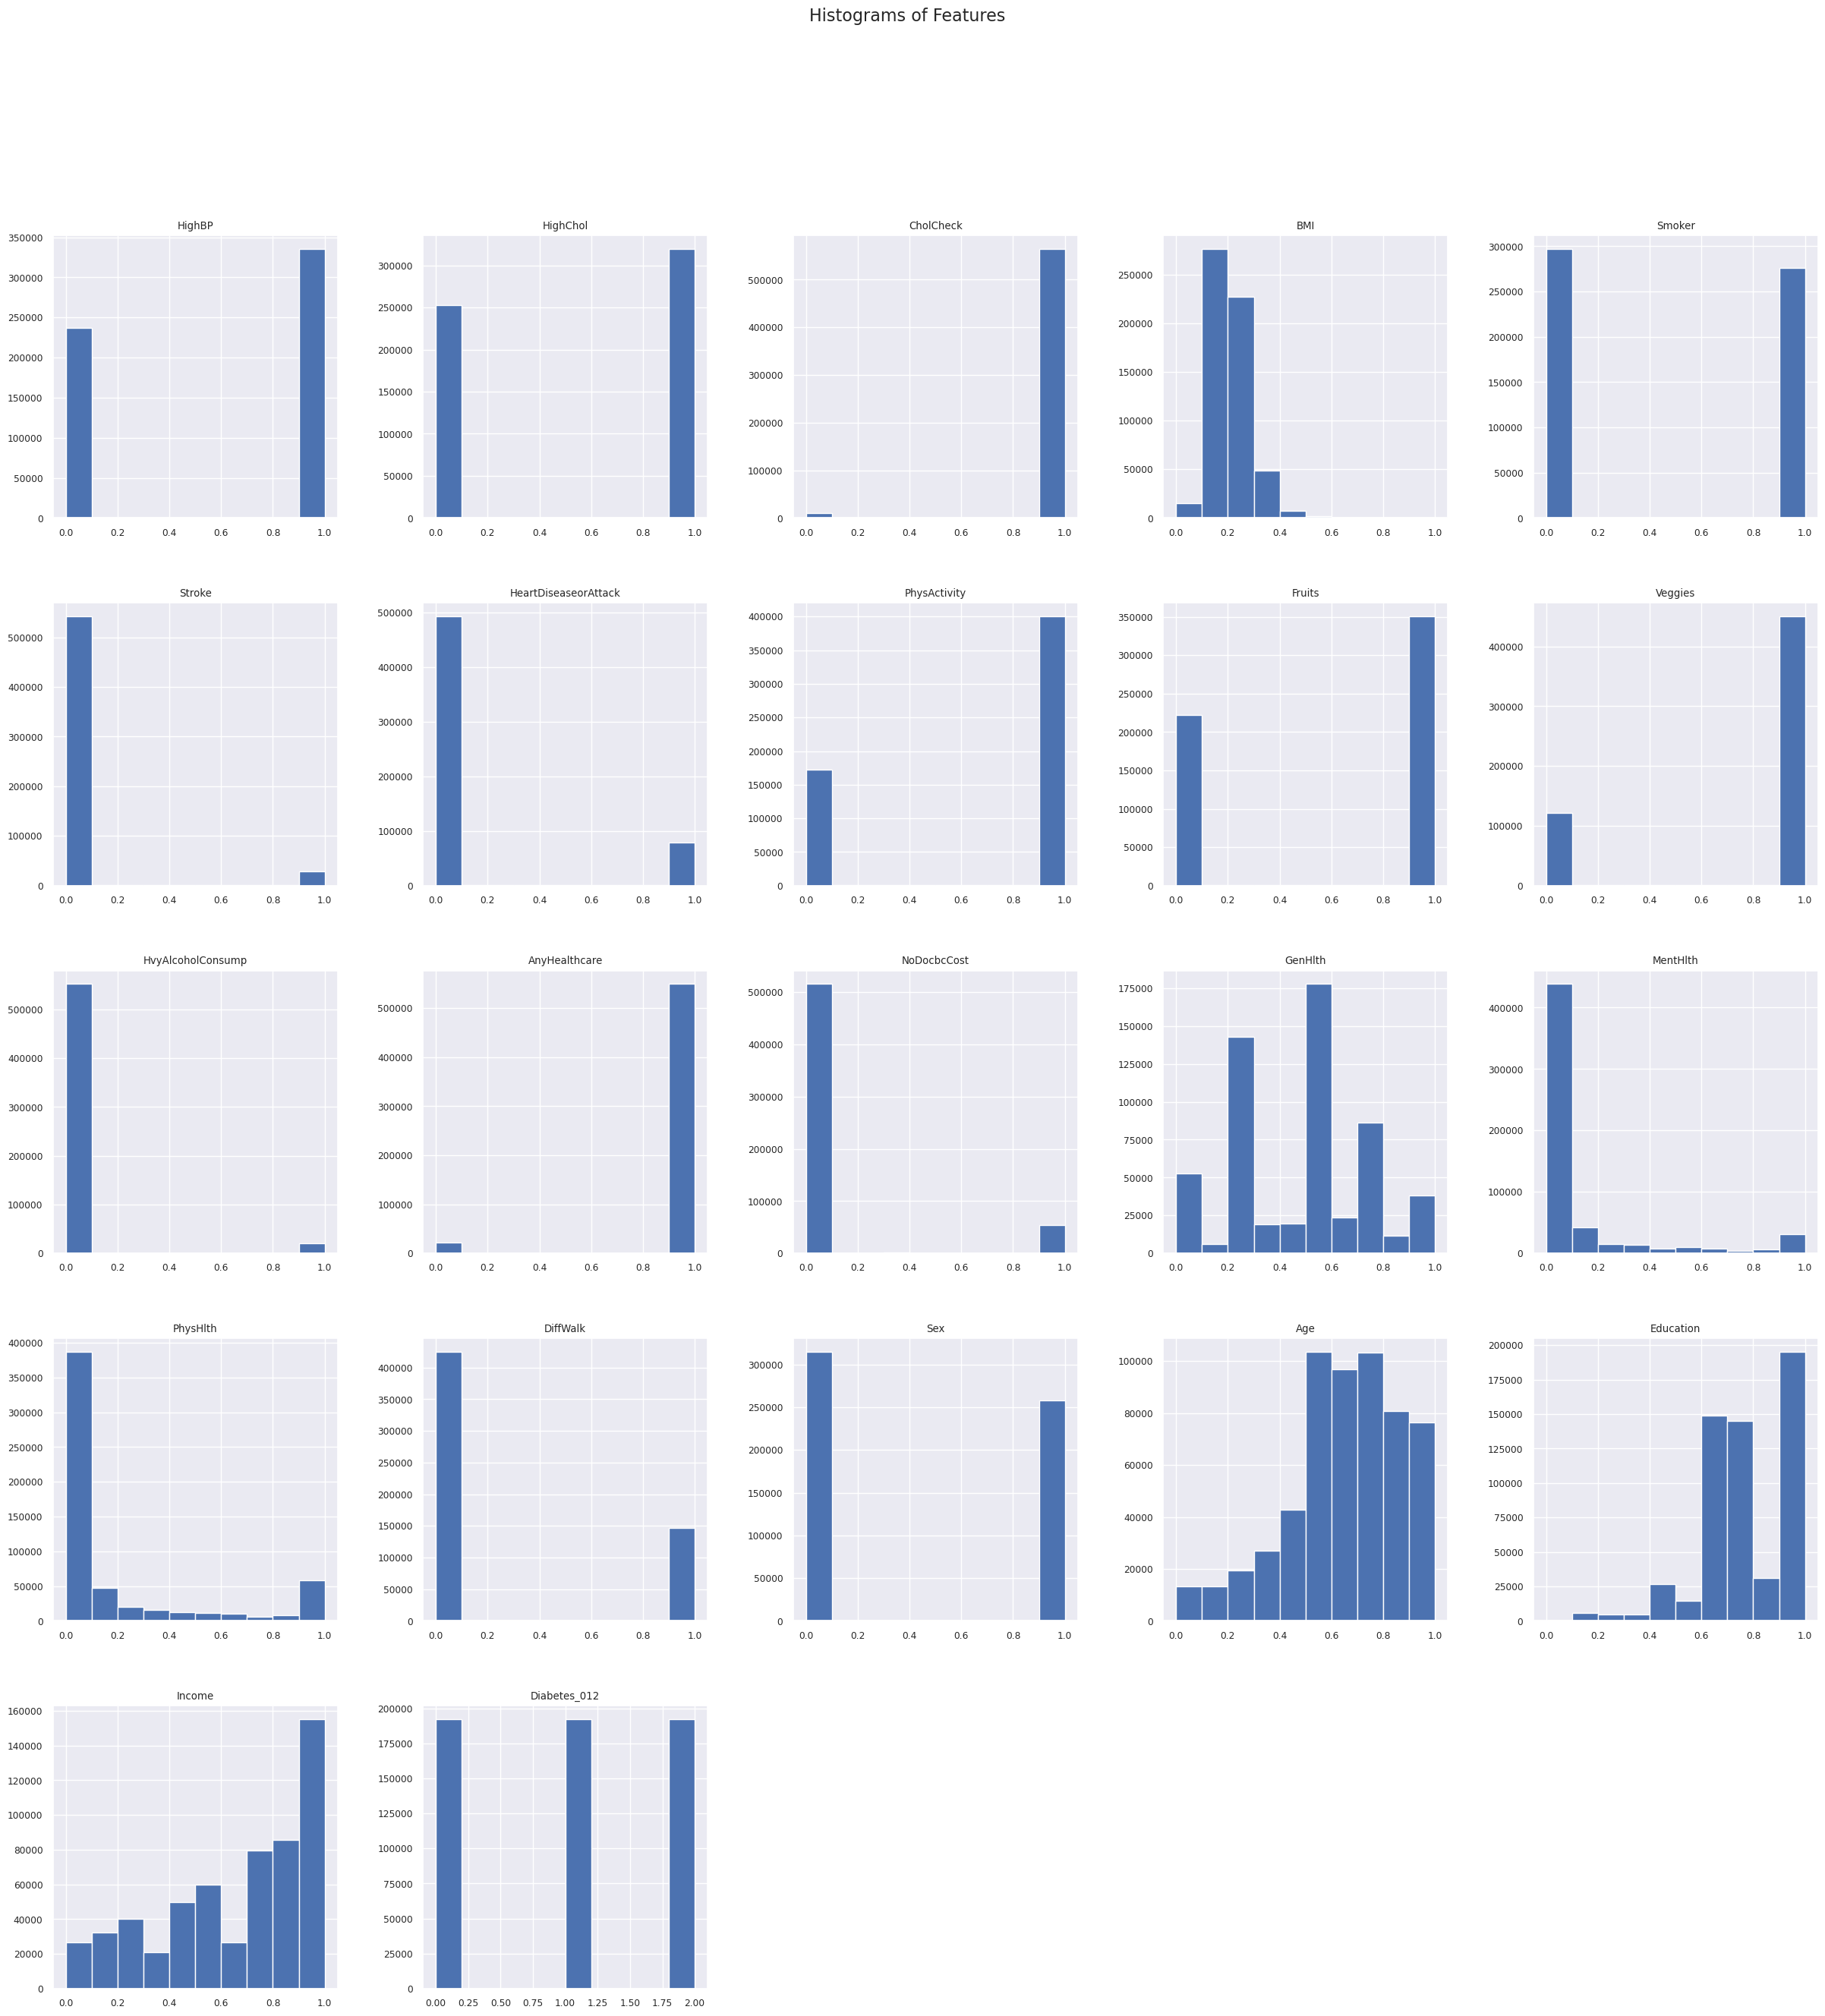

In [56]:
# Histograms for features
train_df.hist(figsize=(30, 30))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

In [57]:
# Look for correlations between features and target
corr_matrix = train_df.corr()
corr_matrix["Diabetes_012"].sort_values(ascending = False)

# The features do not seem strongly correlated with target (Diabetes_012)

Diabetes_012            1.000000
GenHlth                 0.360498
HighBP                  0.319299
BMI                     0.265925
Age                     0.253676
HighChol                0.239088
DiffWalk                0.226406
HeartDiseaseorAttack    0.175987
PhysHlth                0.173496
CholCheck               0.118022
Stroke                  0.105117
Smoker                  0.074272
MentHlth                0.061556
Sex                     0.037051
AnyHealthcare           0.034471
NoDocbcCost             0.029479
Fruits                 -0.049008
Veggies                -0.063789
HvyAlcoholConsump      -0.090845
PhysActivity           -0.131409
Education              -0.144656
Income                 -0.188157
Name: Diabetes_012, dtype: float64

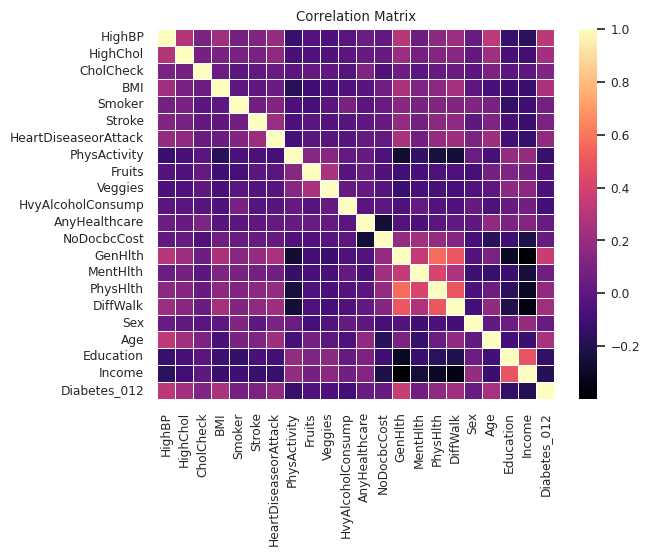

In [58]:
# Heatmap representation
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=False, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()